In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
# Read in data from Kaggle
gdp_o = pd.read_csv("gdp.csv")

# Create new df with columns of interest
gdp = gdp_o[['Country Name', '2020']].copy()

# Clean the data
gdp_c = gdp.drop([0, 1, 3, 7, 11, 36, 38, 49, 52, 61, 62, 63, 64, 65, 68, 73, 74, 78, 84, 95, 98, 102, 103, 104, 105, 107, 108, 110, 128, 135, 136, 139, 140, 142, 146, 147, 153, 156, 161, 172, 181, 183, 191, 197, 198, 204, 215, 217, 218, 225, 230, 231, 236, 238, 240, 241, 249, 255, 256, 259, 6, 69, 91, 137, 164, 193, 199, 212, 216, 227, 235, 254, 262, 134], axis = 0)
gdp_c = gdp_c.reset_index(drop = True)
gdp_c.sort_values(by=['Country Name'])
gdp_c = gdp_c.reset_index(drop = True)

# Create a df with country codes and gdp for visualization
gdp_code = gdp_o[['Code', '2020']].copy()

In [4]:
# Read in altered data from Kaggle
covid = pd.read_csv("covid data world corrected.csv")
covid

,Country Name,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,Afghanistan,178257,7676,161363.0,9218.0,4403,190,931702.0,23014.0,40483797
1,Albania,274236,3494,270378.0,364.0,95479,1216,1787376.0,622298.0,2872219
2,Algeria,265730,6874,178327.0,80529.0,5872,152,230861.0,5101.0,45256195
3,Angola,99194,1900,97149.0,145.0,2860,55,1499795.0,43247.0,34679470
4,Antigua and Barbuda,7523,135,7367.0,21.0,75708,1359,18901.0,190212.0,99368
...,...,...,...,...,...,...,...,...,...,...
199,Venezuela,521618,5697,514288.0,1633.0,18436,201,3359014.0,118723.0,28292923
200,Vietnam,10272964,42858,8757107.0,1472999.0,103879,433,85106796.0,860593.0,98893226
201,Yemen,11814,2147,9000.0,667.0,381,69,265253.0,8559.0,30991448
202,Zambia,317804,3967,313073.0,764.0,16469,206,3382643.0,175292.0,19297192


In [5]:
# FINDING THE NUMBER OF NANS IN TOTAL DEATHS
# CONCLUSION: 0 NANS

letsSee = covid['Total Deaths']             #taking a view of the column of street so we can work with it

k = 0
for row in letsSee:             #starting out the for loop to iterate thru the column
    try:
        float(row)           #if this line works, then that means it wasn't a str and we want to kick it out
        pass

    except ValueError:       #if it throws this error, then it means that it wasn't a float, and we want it to be a NaN
        letsSee.loc[k] = np.nan 
    
    k = k + 1
        
print('Number of NaNs in TOTAL DEATHS:', letsSee.isna().sum())

Number of NaNs in TOTAL DEATHS: 0


In [6]:
# FINDING THE NUMBER OF NANS IN TOTAL CASES
# CONCLUSION: 0 NANS

cases = covid['Total Cases']             #taking a view of the column of street so we can work with it 


k = 0
for row in cases:             #starting out the for loop to iterate thru the column
    try:
        float(row)           #if this line works, then that means it wasn't a str and we want to kick it out
        pass

    except ValueError:       #if it throws this error, then it means that it wasn't a float, and we want it to be a NaN
        cases.loc[k] = np.nan 
    
    k = k + 1
    
print('Number of NaNs in TOTAL CASES:', cases.isna().sum())

Number of NaNs in TOTAL CASES: 0


In [7]:
# FINDING THE NUMBER OF NANS IN POPULATION
# CONCLUSION: 0 NANS

pops = covid['Population']             

k = 0
for row in pops:             #starting out the for loop to iterate thru the column
    try:
        float(row)           #if this line works, then that means it wasn't a str and we want to kick it out
        pass

    except ValueError:       #if it throws this error, then it means that it wasn't a float, and we want it to be a NaN
        pops.loc[k] = np.nan 
    
    k = k + 1
        
print('Number of NaNs in POPULATION:', pops.isna().sum())

Number of NaNs in POPULATION: 0


In [8]:
# Create dfs
casesdf = pd.DataFrame(cases)
popdf = pd.DataFrame(pops)
deathsdf = pd.DataFrame(letsSee)

# Merge covid data with gdp data
merged = pd.merge(covid, gdp_c, how = 'outer', on = 'Country Name', left_index = False, right_index = False, 
                 sort = True, copy = True)
pd.set_option('display.max_rows', None)
merged

,Country Name,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,2020
0,Afghanistan,178257.0,7676.0,161363.0,9218.0,4403.0,190.0,931702.0,23014.0,4.048380e+07,2.011614e+10
1,Albania,274236.0,3494.0,270378.0,364.0,95479.0,1216.0,1787376.0,622298.0,2.872219e+06,1.488763e+10
2,Algeria,265730.0,6874.0,178327.0,80529.0,5872.0,152.0,230861.0,5101.0,4.525620e+07,1.450092e+11
3,Angola,99194.0,1900.0,97149.0,145.0,2860.0,55.0,1499795.0,43247.0,3.467947e+07,5.837598e+10
4,Antigua and Barbuda,7523.0,135.0,7367.0,21.0,75708.0,1359.0,18901.0,190212.0,9.936800e+04,1.370281e+09
5,Argentina,9056203.0,128268.0,8888514.0,39421.0,197166.0,2793.0,35657472.0,776311.0,4.593195e+07,3.892881e+11
6,Armenia,422691.0,8621.0,410365.0,3705.0,142173.0,2900.0,3003171.0,1010123.0,2.973075e+06,1.264121e+10
7,Australia,5194725.0,6644.0,4624577.0,563504.0,199605.0,255.0,67928121.0,2610106.0,2.602504e+07,1.327836e+12
8,Austria,4004069.0,16286.0,3819238.0,168545.0,440123.0,1790.0,179667360.0,19748829.0,9.097621e+06,4.332585e+11
9,Azerbaijan,792289.0,9703.0,782375.0,211.0,76911.0,942.0,6750860.0,655334.0,1.030140e+07,4.260718e+10


In [9]:
# Clean merged df and target columns of interest
mergedFinal = merged[['Country Name', 'Total Cases', 'Total Deaths', 'Population', '2020']].copy()
mergedFinal = mergedFinal.dropna()
mergedFinal

,Country Name,Total Cases,Total Deaths,Population,2020
0,Afghanistan,178257.0,7676.0,4.048380e+07,2.011614e+10
1,Albania,274236.0,3494.0,2.872219e+06,1.488763e+10
2,Algeria,265730.0,6874.0,4.525620e+07,1.450092e+11
3,Angola,99194.0,1900.0,3.467947e+07,5.837598e+10
4,Antigua and Barbuda,7523.0,135.0,9.936800e+04,1.370281e+09
5,Argentina,9056203.0,128268.0,4.593195e+07,3.892881e+11
6,Armenia,422691.0,8621.0,2.973075e+06,1.264121e+10
7,Australia,5194725.0,6644.0,2.602504e+07,1.327836e+12
8,Austria,4004069.0,16286.0,9.097621e+06,4.332585e+11
9,Azerbaijan,792289.0,9703.0,1.030140e+07,4.260718e+10


# SVM

In [10]:
# Create a new dataframe with target information

mergedCopy = mergedFinal.copy()

mergedCopy['Mortality Rate'] = mergedCopy['Total Deaths'] / mergedCopy['Total Cases']

mor_rate = mergedCopy[['Mortality Rate']].to_numpy()

mor_flat = mor_rate.flatten()

mergedFinal['Mortality Rate'] = pd.Series(mor_flat)*100

covfin = mergedFinal[['2020', 'Mortality Rate', 'Population']]
covfin = covfin.dropna()
covfin

,2020,Mortality Rate,Population
0,2.011614e+10,4.306142,4.048380e+07
1,1.488763e+10,1.274085,2.872219e+06
2,1.450092e+11,2.586836,4.525620e+07
3,5.837598e+10,1.915438,3.467947e+07
4,1.370281e+09,1.794497,9.936800e+04
5,3.892881e+11,1.416355,4.593195e+07
6,1.264121e+10,2.039551,2.973075e+06
7,1.327836e+12,0.127899,2.602504e+07
8,4.332585e+11,0.406736,9.097621e+06
9,4.260718e+10,1.224679,1.030140e+07


# K Nearest Neighbors

In [11]:
covfin = covfin.astype('int64')
X_mor = covfin.drop('Mortality Rate', axis = 1)
y_mor = covfin['Mortality Rate']

Xtrain, Xtest, ytrain, ytest = train_test_split(X_mor, y_mor, random_state = 1, test_size = 0.4)

In [12]:
print(y_mor)

0      4
1      1
2      2
3      1
4      1
5      1
6      2
7      0
8      0
9      1
10     2
11     0
12     1
13     0
14     0
15     0
16     1
17     0
18     1
19     0
20     2
21     4
22     0
23     2
24     0
25     3
26     1
27     0
28     0
29     2
30     1
31     1
34     1
35     2
37     1
38     1
39     1
40     0
41     1
42     0
43     0
45     1
46     0
47     1
48     0
49     0
50     4
51     4
52     2
53     1
54     0
55     1
56     1
57     1
59     0
60     0
61     3
63     0
64     0
65     0
68     1
69     2
70     1
71     2
72     2
74     2
76     1
79     1
80     0
81     0
82     1
83     2
84     0
85     0
86     1
87     1
88     0
89     0
90     1
91     0
92     0
94     2
95     3
97     0
98     0
99     2
100    3
101    0
103    2
105    1
106    2
107    5
108    2
109    0
110    0
111    1
112    1
114    3
115    2
116    1
117    0
118    0
119    1
120    3
121    1
124    1
125    1
127    1
129    5
130    1
131    1
1

In [25]:
model = KNeighborsClassifier(n_neighbors = 87)
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
print("Accuracy score report: ")
from sklearn.metrics import accuracy_score
a = accuracy_score(ytest, y_model)
print(a)

Accuracy score report: 
0.3728813559322034


In [19]:
## Mortality Rate vs. GDP Preliminary Graph

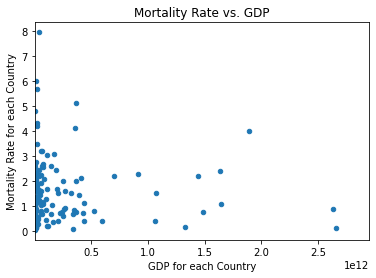

In [18]:
mergedFinal.plot(x = '2020', y = 'Mortality Rate', kind = 'scatter', xlabel='GDP for each Country', ylabel='Mortality Rate for each Country', title='Mortality Rate vs. GDP')

fig = plt.xlim(472914469.91933, 2953030000000.0)

# Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier 

tree_classifier = DecisionTreeClassifier()
y_predict = tree_classifier.fit(Xtrain, ytrain).predict(Xtest)

accu = accuracy_score(ytest, y_predict)
print('Score: ', accu)

Score:  0.2542372881355932


# Gaussian Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB  # 1. choose model class
model = GaussianNB()                        # 2. instantiate the model
model.fit(Xtrain, ytrain)                   # 3. fit the model to the data
y_model = model.predict(Xtest)              # 4. predict on new data
acc = accuracy_score(ytest, y_model)
print('Score: ', acc)

Score:  0.3389830508474576


In [26]:
data = {'Model':['K-Neighbor Classifier', 'Gaussian Naive Bayes', 'Decision Tree'],

        'Accuracy (%)':[a*100, acc*100, accu*100]}

#Creating DataFrame

all_together = pd.DataFrame(data)

all_together

,Model,Accuracy (%)
0,K-Neighbor Classifier,37.288136
1,Gaussian Naive Bayes,33.898305
2,Decision Tree,25.423729
